In [1]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:

# Step 2: Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [3]:
# Step 3: Convert to DataFrame for easy plotting
df = pd.DataFrame(X, columns=feature_names)
df["species"] = [target_names[i] for i in y]
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


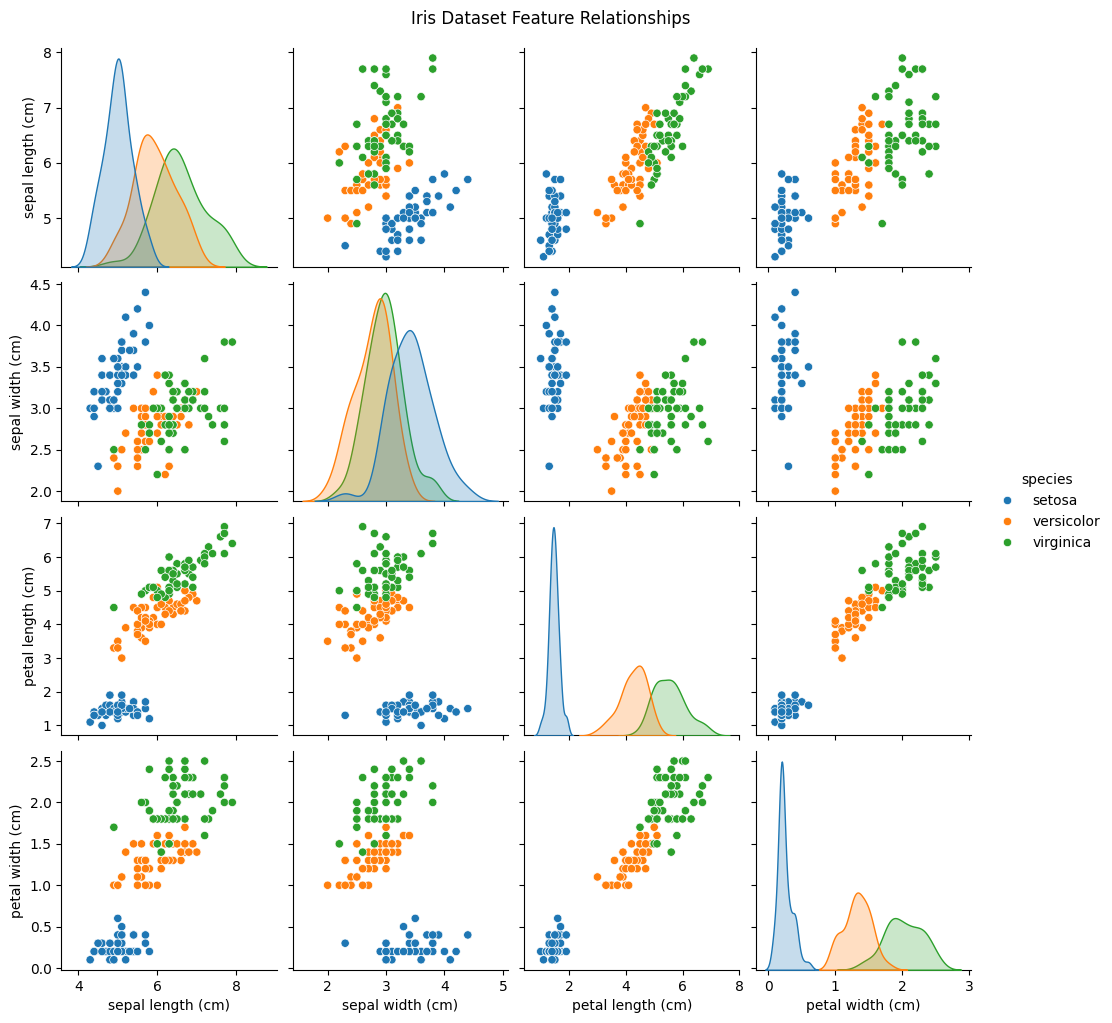

<Figure size 640x480 with 0 Axes>

In [5]:

# Step 4: Quick data visualization
sns.pairplot(df, hue="species", diag_kind="kde")
plt.suptitle("Iris Dataset Feature Relationships", y=1.02)
plt.show()
plt.savefig("iris_pairplot.png")

In [6]:
# Step 5: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [7]:

# Step 6: Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

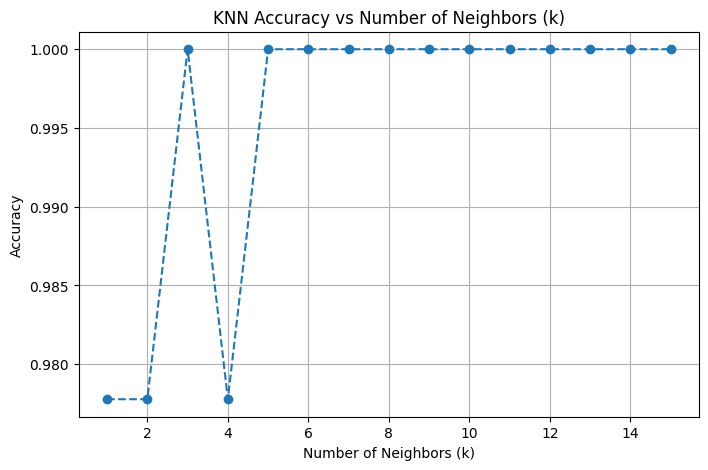

Best k = 3 with accuracy = 1.000


<Figure size 640x480 with 0 Axes>

In [9]:
# Step 7: Tune k (number of neighbors)
accuracy_scores = []
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracy_scores.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 16), accuracy_scores, marker="o", linestyle="--")
plt.title("KNN Accuracy vs Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
plt.savefig("knn_accuracy_vs_k.png")

best_k = np.argmax(accuracy_scores) + 1
print(f"Best k = {best_k} with accuracy = {accuracy_scores[best_k-1]:.3f}")


In [10]:

# Step 8: Train final model with best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


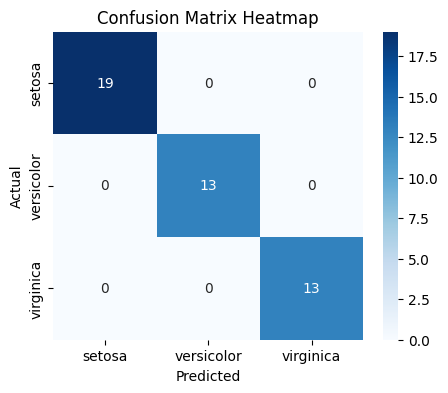


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0


<Figure size 640x480 with 0 Axes>

In [12]:
# Step 9: Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d",
            cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()
plt.savefig("confusion_matrix_heatmap.png")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))
print("Accuracy:", accuracy_score(y_test, y_pred))


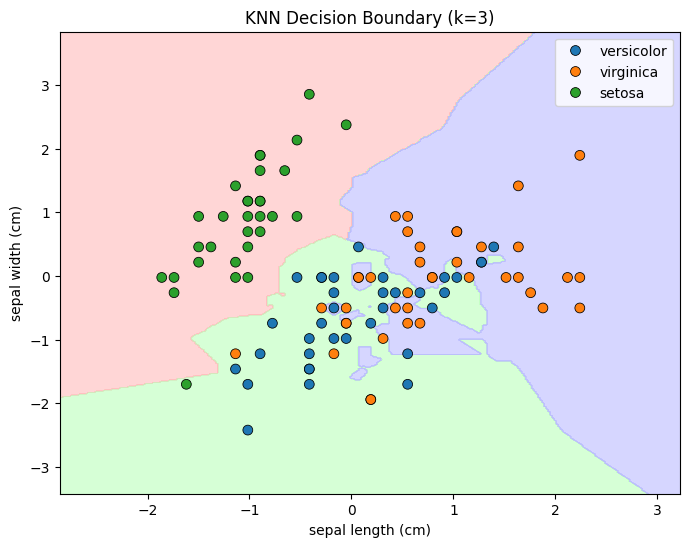

<Figure size 640x480 with 0 Axes>

In [14]:
# Step 10: Visualize decision boundary (only using 2 features for plotting)
from matplotlib.colors import ListedColormap

X_vis = X[:, :2]  # take first two features for 2D visualization
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.3, random_state=42
)

scaler_vis = StandardScaler()
X_train_vis = scaler_vis.fit_transform(X_train_vis)
X_test_vis = scaler_vis.transform(X_test_vis)

knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

# Create mesh grid
x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict over the grid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(["#FFBBBB", "#BBFFBB", "#BBBBFF"])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

# Plot training points
sns.scatterplot(x=X_train_vis[:, 0], y=X_train_vis[:, 1],
                hue=[target_names[i] for i in y_train_vis],
                s=50, edgecolor="k")
plt.title(f"KNN Decision Boundary (k={best_k})")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()
plt.savefig("knn_decision_boundary.png")